<a href="https://colab.research.google.com/github/Shaimaa264/ML-project/blob/main/S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import zipfile
from io import BytesIO
!pip install combat
!pip install combat --upgrade
!pip install inmoose
from inmoose.pycombat import pycombat_norm, pycombat_seq
from combat.pycombat import pycombat
from sklearn.model_selection import train_test_split
!pip install conorm
import conorm as conorm
from sklearn.preprocessing import LabelEncoder
from conorm import tmm_norm_factors
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
!pip install rnanorm
!pip install mrmr_selection
from mrmr import mrmr_classif
!pip install imbalanced-learn

  Preparing metadata (setup.py) ... done
  Created wheel for combat: filename=combat-0.3.3-py3-none-any.whl size=36782 sha256=14f067b2af8c88371551db6becb4264f0a2f4df969ab335d20514e1b6d76d6d5
  Stored in directory: /root/.cache/pip/wheels/0d/e4/46/5c7b89d38f5160cf8f2fdda0a52c93439b6e7d9d661e8336f4
Successfully built combat
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
  Created wheel for inmoose: filename=inmoose-0.7.3-cp310-cp310-linux_x86_64.whl size=5074068 sha256=d8813c6338f92b4fba304852440c8695112d1fa4011fe4e5e202b3d10cbac6ef
  Stored in dir

In [ ]:
sample_url = "https://raw.githubusercontent.com/MyronBest/InTVeld_Pancancer_TSOO/main/TableS2.csv"

sampleinfo = pd.read_csv(sample_url)
sampleinfo.drop('Unnamed: 0', axis=1, inplace=True)

sampleinfo=sampleinfo[(sampleinfo['Group']=='Ovarian cancer')|(sampleinfo['Group']=='Asymptomatic controls')]

sampleinfo=sampleinfo.loc[sampleinfo['Sex']=='F']

sampleinfo = sampleinfo[~((sampleinfo['Group'] == 'Ovarian cancer') & (sampleinfo['Stage'] == 'n.a.'))]

sampleinfo['Stage']=sampleinfo['Stage'].replace(to_replace='n.a.',value='Control')


In [ ]:
order = ["Institute 1", "Institute 2", "Institute 3", "Institute 4", "Institute 5",
                "Institute 10", "Institute 12", "Institute 13"]

sampleinfo = sampleinfo.sort_values(by="Sample.supplying.institution").reset_index(drop=True)

Samples=sampleinfo['Sample.ID'].tolist()

In [ ]:
url = 'https://github.com/Shaimaa264/ML-project/raw/refs/heads/main/Counts.zip'
response = requests.get(url)

with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('extracted')

counts = pd.read_csv('/content/extracted/Counts/TEP_Control_Count.csv', index_col=0)

print(counts.head())

counts.columns = counts.columns.str.replace(r'^.*?-', '', regex=True)
counts=counts[Samples]
print(counts.shape)
print(counts.columns==Samples)
counts = counts[Samples]

                 1-Vumc-HD-101-TR922  2-Vumc-HD-103-TR923  \
ENSG00000000419                    5                   79   
ENSG00000000460                    8                   10   
ENSG00000000938                   24                  336   
ENSG00000001036                   38                   46   
ENSG00000001461                   72                   17   

                 3-Vumc-HD-108-TR924  4-Vumc-HD-127-TR925  \
ENSG00000000419                   58                  128   
ENSG00000000460                   21                   14   
ENSG00000000938                  334                   59   
ENSG00000001036                   15                   36   
ENSG00000001461                   11                    9   

                 5-Vumc-HD-130-TR926  6-Vumc-HD-142-TR927  \
ENSG00000000419                   93                   12   
ENSG00000000460                    6                    8   
ENSG00000000938                  120                   22   
ENSG00000001036       

In [ ]:
genes=pd.read_csv('https://github.com/Shaimaa264/ML-project/raw/refs/heads/main/genes.csv')
genes.drop('Unnamed: 0', axis=1, inplace=True)
print(genes.head())
y_genes=genes[genes['chromosome_name']=='Y']
y_genes=y_genes['ensembl_gene_id'].tolist()
print(len(y_genes))
genes_in_counts=counts.index.tolist()
matching_y = list(set(y_genes).intersection(genes_in_counts))
counts=counts.drop(matching_y)
genes.set_index(genes['ensembl_gene_id'], inplace=False)
genes_in_counts=counts.index.tolist()
mask = genes['ensembl_gene_id'].isin(genes_in_counts)
genes_in_counts=genes[mask]

   ensembl_gene_id hgnc_symbol  \
0  ENSG00000000003      TSPAN6   
1  ENSG00000000005        TNMD   
2  ENSG00000000419        DPM1   
3  ENSG00000000457       SCYL3   
4  ENSG00000000460    C1orf112   

                                         description chromosome_name    band  \
0       tetraspanin 6 [Source:HGNC Symbol;Acc:11858]               X   q22.1   
1         tenomodulin [Source:HGNC Symbol;Acc:17757]               X   q22.1   
2  dolichyl-phosphate mannosyltransferase polypep...              20  q13.13   
3  SCY1-like 3 (S. cerevisiae) [Source:HGNC Symbo...               1   q24.2   
4  chromosome 1 open reading frame 112 [Source:HG...               1   q24.2   

   strand  start_position  end_position  coding_gene_size  
0      -1        99883667      99894988              2968  
1       1        99839799      99854882              1610  
2      -1        49551404      49575092              1207  
3      -1       169818772     169863408              6876  
4       1     

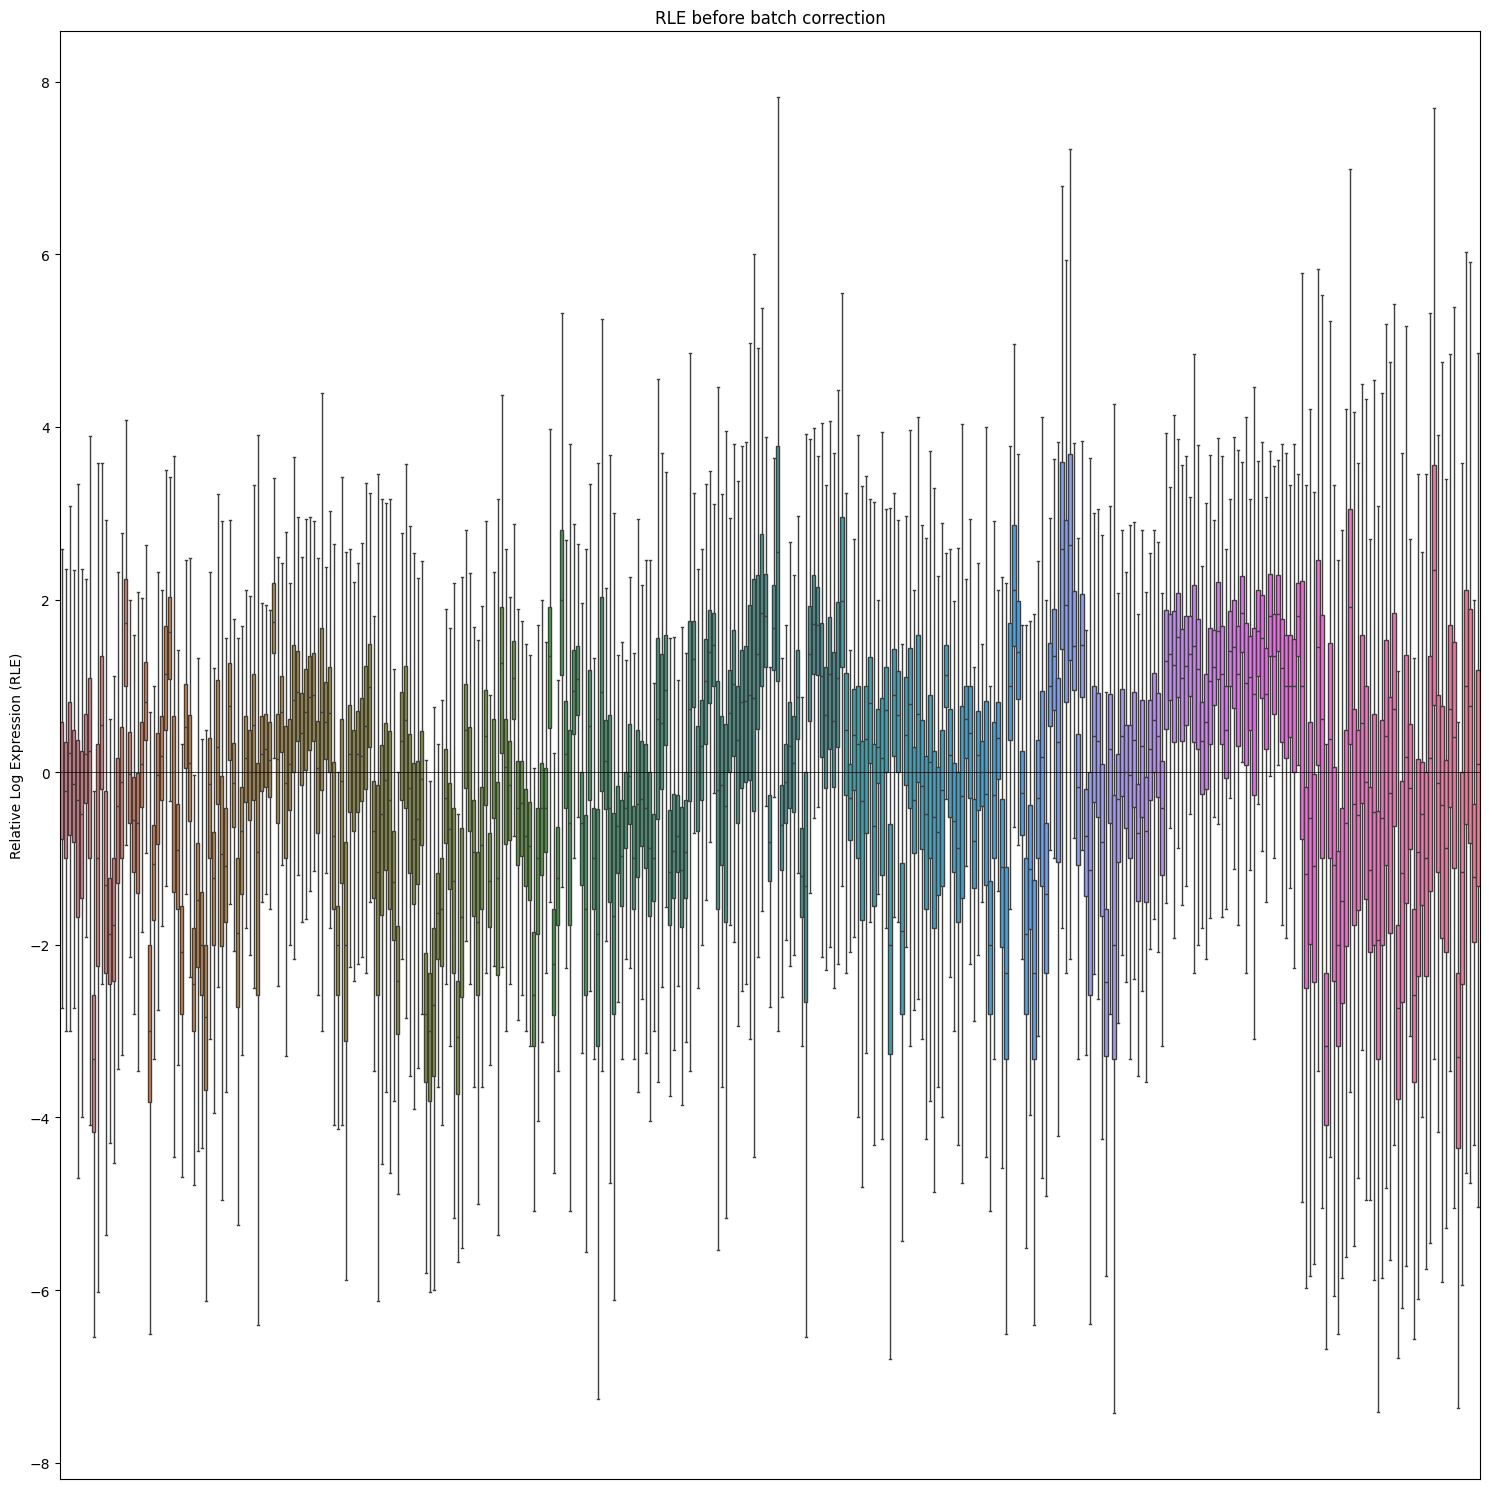

In [ ]:
RLE=counts.copy()
medians=RLE.median(axis=1)
RLE=np.log2(RLE + 1).sub(np.log2(medians + 1), axis=0)
plt.figure(figsize=(15,15))
sns.boxplot(data=RLE, showfliers=False)
plt.ylabel("Relative Log Expression (RLE)")
plt.title("RLE before batch correction")
plt.xticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.tight_layout()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.show()

#**Batch Effect Correction**

InMoose provides features to correct technical biases, also called batch effects, in transcriptomic data:

***for microarray data***,
InMoose supersedes pyCombat [1], a Python 3 implementation of ComBat [2], one of the most widely used tool for batch effect correction on microarray data.

***for RNASeq***, InMoose features a port to Python3 of ComBat-Seq [3], one of the most widely used tool for batch effect correction on RNASeq data.
To use these functions, simply import them and call them with default parameters:

`from inmoose.pycombat import pycombat_norm, pycombat_seq`

`microarray_corrected = pycombat_norm(microarray_data, microarray_batches)`

`rnaseq_corrected = pycombat_seq(rnaseq_data, rnaseq_batches)`


#**microarray_data, rnaseq_data:**
the expression matrices, containing the information about the gene expression (rows) for each sample (columns).

#**microarray_batches, rnaseq_batches:**
list of batch indices, describing the batch for each sample. The list of batches should contain as many elements as the number of samples in the expression matrix.


**##ComBat-seq and pyComBat (pycombat_seq)**
both work on data that follow a negative binomial distribution, which is the distribution of raw counts in RNA-Seq data. No preprocessing of the raw counts is thus needed.
https://doi.org/10.1186/s12859-023-05578-5

In [ ]:
corrected = pycombat_seq(counts, sampleinfo['Sample.supplying.institution'])
corrected=pd.DataFrame(corrected, columns=Samples, index=genes_in_counts['ensembl_gene_id'])
corrected=corrected.transpose()


In [ ]:
from rnanorm import TMM
tmm = TMM().fit(corrected)
tmm.get_norm_factors(corrected)
norm=tmm.transform(corrected)
norm=pd.DataFrame(data=norm, columns=genes_in_counts['ensembl_gene_id'])
Encoder=LabelEncoder()
norm.insert(5434, 'Stage', value=sampleinfo['Stage'])
norm['Stage']=Encoder.fit_transform(norm['Stage'])

#**Visualization after batch correction**

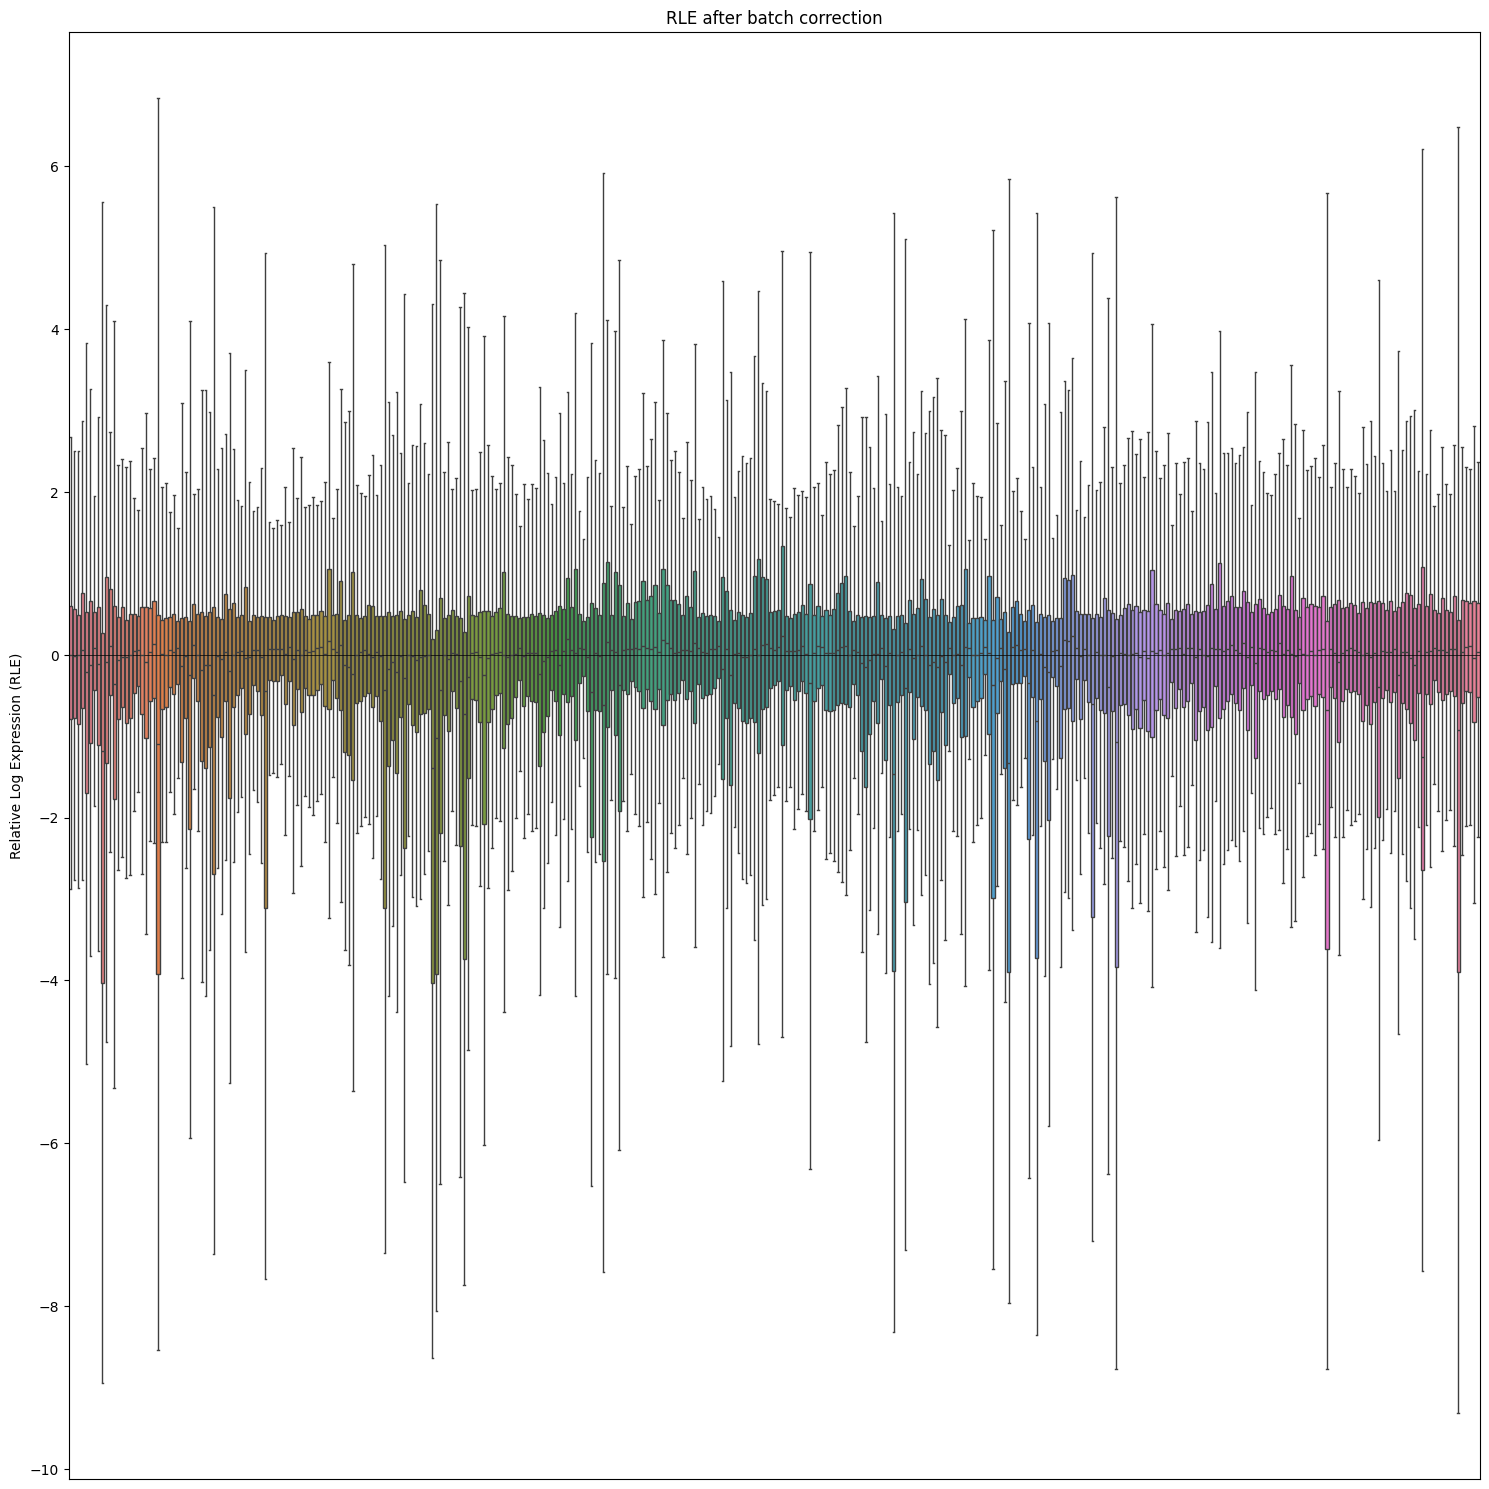

In [ ]:
RLE=norm.iloc[:, :-1].transpose()
medians=RLE.median(axis=1)
RLE=np.log2(RLE + 1).sub(np.log2(medians + 1), axis=0)
plt.figure(figsize=(15,15))
sns.boxplot(data=RLE, showfliers=False)
plt.ylabel("Relative Log Expression (RLE)")
plt.title("RLE after batch correction")
plt.xticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.tight_layout()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.show()

#Remove highly correlated features#

In [ ]:
#Remove highly correlated features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit_transform(norm.iloc[:,:-1])
selector.get_support()
var_selected=list(selector.get_feature_names_out())
var_selected=norm.loc[:,var_selected]
var_selected.set_index(sampleinfo['Sample.ID'],inplace=True)

#split and tranform lebels#

In [ ]:
StageII_samples=sampleinfo.copy()
StageII_samples['Stage'] = StageII_samples['Stage'].replace(['I', 'III', 'IV'], 'rest')
StageII_samples=StageII_samples[StageII_samples['Stage'] != 'rest']
StageII_IDs=StageII_samples['Sample.ID'].tolist()
StageII_samples['Stage']=Encoder.fit_transform(StageII_samples['Stage'])

In [ ]:
y=StageII_samples['Stage'].to_numpy()
X=var_selected.loc[StageII_IDs].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

#training_data=pd.DataFrame(data=X_train, columns=norm.iloc[:, :-1].columns)
#training_data.insert(4188, 'Stage', value=y_train)
#testing_data=pd.DataFrame(data=X_test, columns=norm.iloc[:, :-1].columns)
#testing_data.insert(4188, 'Stage', value=y_test)

#Stage 1 versus control#

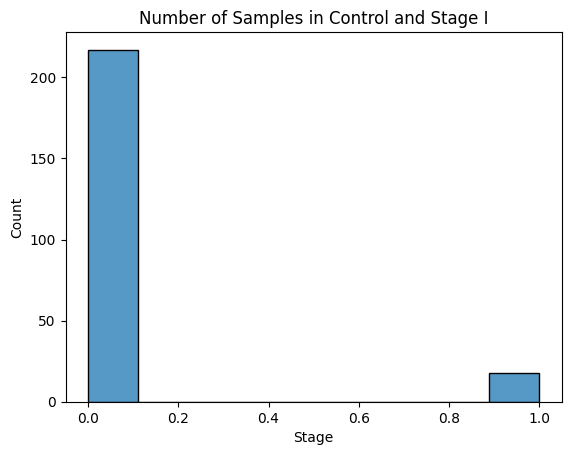

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(StageII_samples['Stage'])
plt.title('Number of Samples in Control and Stage I')
plt.show()

In [ ]:
print(X.shape)
classes, counts = np.unique(y, return_counts=True)
print(f"classes: {classes}")
print(f"Counts: {counts}")

(235, 5434)
classes: [0 1]
Counts: [217  18]


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
print(X_res.shape)
classes, counts = np.unique(y_res, return_counts=True)
print(f"classes: {classes}")
print(f"Counts: {counts}")

(434, 5434)
classes: [0 1]
Counts: [217 217]


#Information gain#

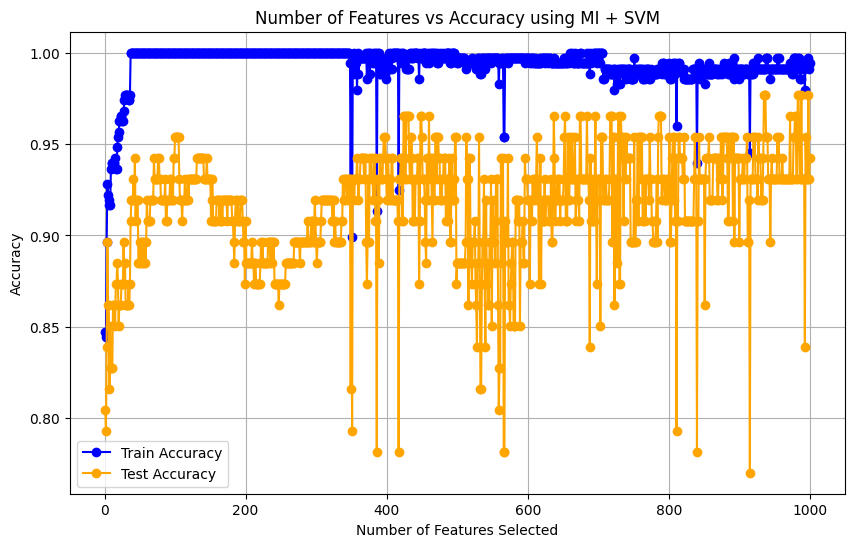

Highest Test Accuracy: 0.9770
Number of Selected Features for Highest Test Accuracy: 935


In [ ]:
"""
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SVC = LinearSVC(C=0.01, class_weight='balanced', random_state=40)

mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, random_state=40)

sorted_indices = np.argsort(mi_scores)[::-1]

num_features = []
train_accuracies = []
test_accuracies = []

for n_features in range(1, min(1001, len(sorted_indices) + 1)):
    selected_features = sorted_indices[:n_features]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    SVC.fit(X_train_selected, y_train)

    y_train_pred = SVC.predict(X_train_selected)
    y_test_pred = SVC.predict(X_test_selected)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    num_features.append(n_features)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

max_test_index = np.argmax(test_accuracies)
max_test_accuracy = test_accuracies[max_test_index]
best_num_features = num_features[max_test_index]


plt.figure(figsize=(10, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='orange', marker='o')

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy using MI + SVM')
plt.legend()
plt.grid(True)
plt.show()

print(f"Highest Test Accuracy: {max_test_accuracy:.4f}")
print(f"Number of Selected Features for Highest Test Accuracy: {best_num_features}")""""

In [ ]:
# Find the maximum test accuracy
max_test_accuracy = max(test_accuracies)

# Find all indices where the test accuracy is equal to the maximum
indices_with_max_accuracy = [i for i, acc in enumerate(test_accuracies) if acc == max_test_accuracy]

# Identify the highest number of features among those indices
best_num_features = max([num_features[i] for i in indices_with_max_accuracy])

# Print results
print(f"Highest Test Accuracy: {max_test_accuracy:.4f}")
print(f"Maximum Number of Features for Highest Test Accuracy: {best_num_features}")


Highest Test Accuracy: 0.9770
Maximum Number of Features for Highest Test Accuracy: 998


In [ ]:
from sklearn.feature_selection import mutual_info_classif
selector_MI = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, random_state=40)

In [ ]:
mutual_info = pd.Series(selector_MI)
mutual_info.index = var_selected.columns
mutual_info=mutual_info.sort_values(ascending=False)
mutual_info=mutual_info[:935]
mutual_info=mutual_info.index.tolist()

In [ ]:
X=var_selected.loc[StageI_IDs, mutual_info].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

#MRMR#

In [ ]:
training_data=pd.DataFrame(data=X_train, columns=genes_in_counts['ensembl_gene_id'])
training_data = training_data.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

In [ ]:
mrmrselected = mrmr_classif(X=training_data, y=pd.Series(y_train), K=250)

100%|██████████| 250/250 [07:32<00:00,  1.81s/it]


In [ ]:
mrmr_features=mrmrselected.copy()

In [ ]:
X=var_selected.loc[StageII_IDs, mrmr_features].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

#Wrapper

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearSVC(C=0.01, random_state=40)

18


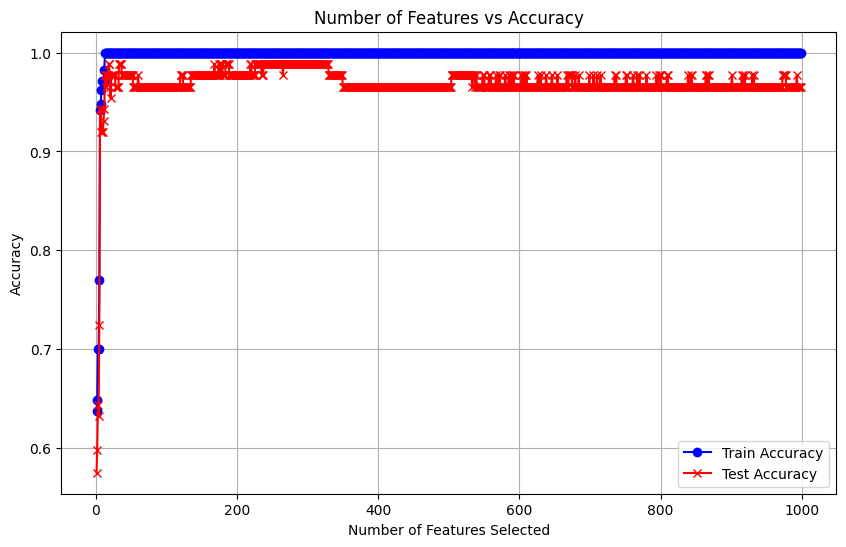

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import numpy as np

SVC = LinearSVC(C=0.01, class_weight='balanced', random_state=40)
num_features = []
train_accuracies = []
test_accuracies = []
for n_features in range(1, 1000):
    selector = RFE(SVC, n_features_to_select=n_features, step=0.01)
    selector = selector.fit(X_train, y_train)
    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    num_features.append(n_features)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

max_test_index = np.argmax(test_accuracies)
max_test_accuracy = test_accuracies[max_test_index]
best_num_features = num_features[max_test_index]
print(best_num_features)

plt.figure(figsize=(10, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='red', marker='x')

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()





#27 minutes

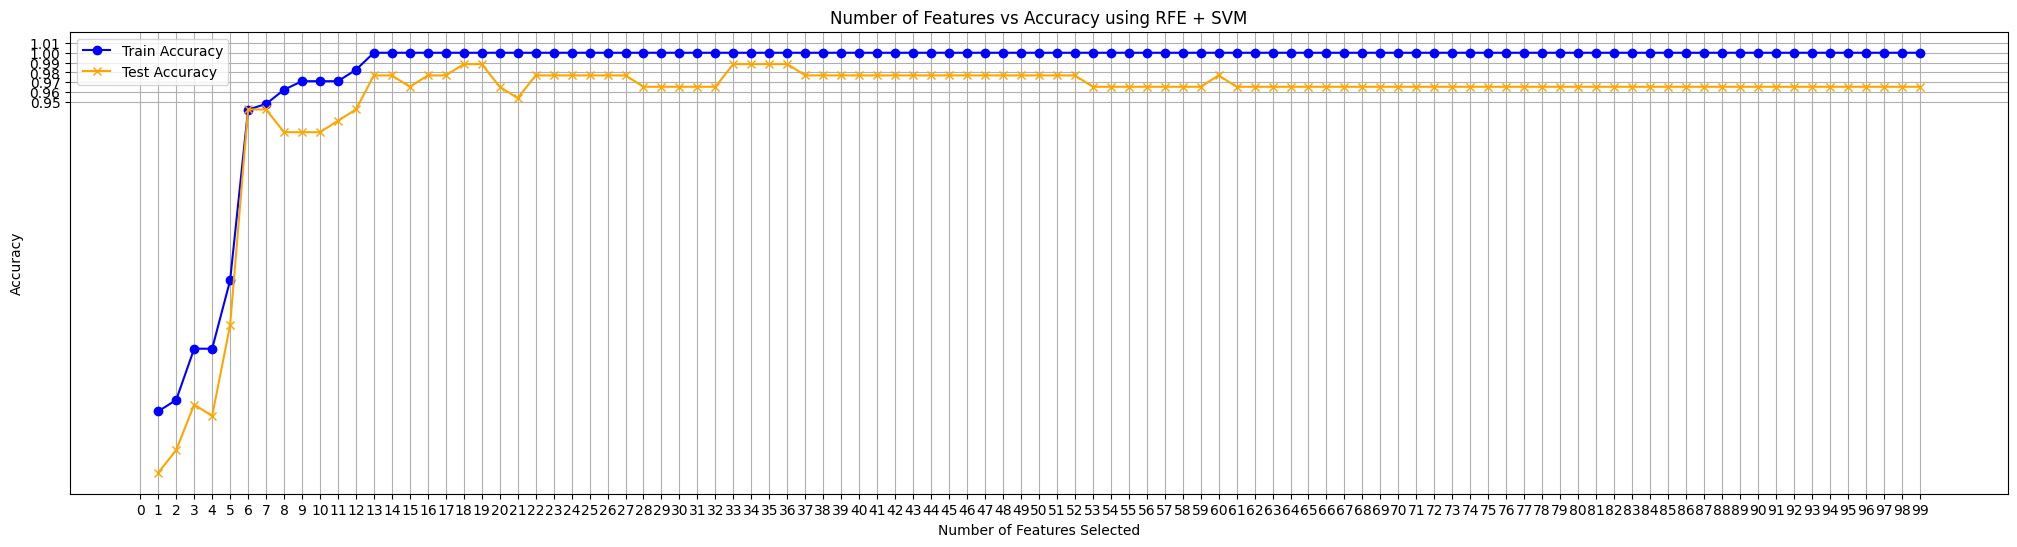

In [ ]:
plt.figure(figsize=(25, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='orange', marker='x')

plt.xticks(ticks=np.arange(0, max(num_features) + 1, 1))
plt.yticks(ticks=np.arange(0.95, 1.01, 0.01))

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy using RFE + SVM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max_test_index = np.argmax(test_accuracies)
max_test_accuracy = test_accuracies[max_test_index]
best_num_features = num_features[max_test_index]
print(best_num_features)

18


In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
SVC=LinearSVC(C=0.01, class_weight='balanced', random_state=40)
selector = RFE(SVC, n_features_to_select= 18, step=0.01)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
score=selector.score(X_test, y_test)
rfe_selected=list(np.where(selector.support_ == 1)[0])
rfe_selected = [mrmr_features[i] for i in rfe_selected]
print(accuracy_score(y_train, selector.predict(X_train)))
print(accuracy_score(y_test, selector.predict(X_test)))

1.0
0.9885057471264368


#MRMR 250, RFE-SVM=25 ACCURACY 98%

In [ ]:
X=var_selected.loc[StageII_IDs, rfe_selected].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
param_grid = {'C': [0.01, 0.1, 1,5, 10,50,100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearSVC(C=0.1, random_state=40)

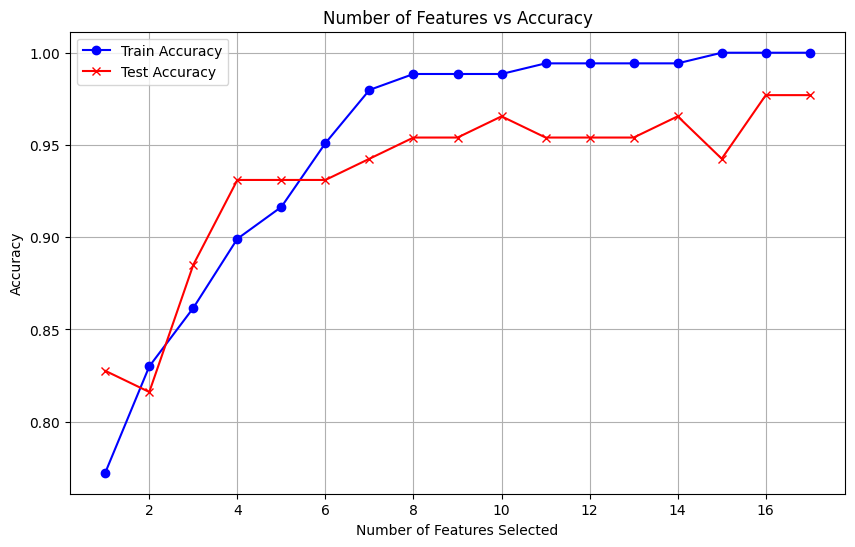

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
SVC=LinearSVC(C=0.1, class_weight='balanced', random_state=40)

num_features = []
train_accuracies = []
test_accuracies = []

for n_features in range(1, 18):
    selector = SequentialFeatureSelector(SVC, n_features_to_select=n_features, direction='forward', scoring='accuracy', cv=5)
    selector.fit(X_train, y_train)

    X_train_reduced = selector.transform(X_train)
    X_test_reduced = selector.transform(X_test)

    SVC.fit(X_train_reduced, y_train)

    y_train_pred = SVC.predict(X_train_reduced)
    y_test_pred = SVC.predict(X_test_reduced)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    num_features.append(n_features)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='red', marker='x')

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#5 minutes

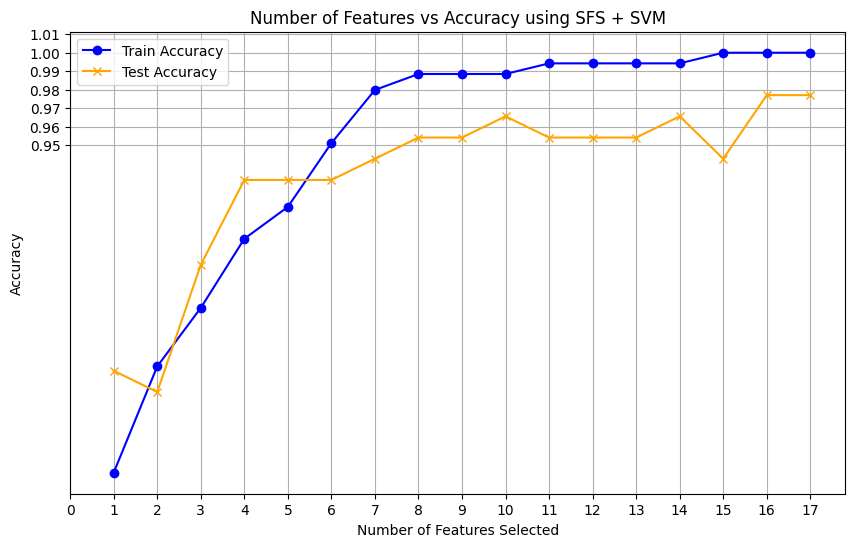

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(num_features, test_accuracies, label='Test Accuracy', color='orange', marker='x')

plt.xticks(ticks=np.arange(0, max(num_features) + 1, 1))
plt.yticks(ticks=np.arange(0.95, 1.01, 0.01))

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy using SFS + SVM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max_test_index = np.argmax(test_accuracies)
max_test_accuracy = test_accuracies[max_test_index]
best_num_features = num_features[max_test_index]
print(best_num_features)

16


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
SVC=LinearSVC(C=0.1, class_weight='balanced', random_state=40)
sfs=SequentialFeatureSelector(SVC, n_features_to_select=16)
sfs.fit(X_train,y_train)
sfs_selected=sfs.get_support(indices=True).tolist()
sfs_selected=[rfe_selected[i] for i in sfs_selected]

In [ ]:
X=var_selected.loc[StageII_IDs, sfs_selected].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2, random_state=40, stratify=y_res)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(LinearSVC(random_state=40), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_res, y_res)
grid_search.best_estimator_

LinearSVC(C=0.01, random_state=40)

In [ ]:
SVC=LinearSVC(C=0.01, class_weight='balanced', random_state=40)
SVC.fit(X_train, y_train)
print(accuracy_score(y_train, SVC.predict(X_train)))
print(accuracy_score(y_test, SVC.predict(X_test)))

1.0
0.9770114942528736


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (includes precision, recall, and F1 for each class)
class_report = classification_report(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Precision: 0.9888
Recall: 0.9885
F1-Score: 0.9885
Confusion Matrix:
[[43  1]
 [ 0 43]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        43

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
DEGs = [
    "ENSG00000153046", "ENSG00000131725", "ENSG00000172543", "ENSG00000185909", "ENSG00000213465",
    "ENSG00000116260", "ENSG00000103202", "ENSG00000164024", "ENSG00000160932", "ENSG00000183696",
    "ENSG00000179218", "ENSG00000196843", "ENSG00000137752", "ENSG00000142961", "ENSG00000160593",
    "ENSG00000153395", "ENSG00000118007", "ENSG00000178537", "ENSG00000079308", "ENSG00000198467",
    "ENSG00000240225", "ENSG00000145907", "ENSG00000140749", "ENSG00000165609", "ENSG00000069493",
    "ENSG00000163359", "ENSG00000132405", "ENSG00000073969", "ENSG00000109320", "ENSG00000145214",
    "ENSG00000168906", "ENSG00000184708", "ENSG00000140105", "ENSG00000108854", "ENSG00000089127",
    "ENSG00000189091"
]
common= list(set(DEGs).intersection(sfs_selected))
print("Common items:", common)


Common items: []


In [ ]:
gene_symbols=[
    "AC138811.1", "STK4", "PLEK", "COPA", "RAB3GAP1", "NAP1L4", "TNFAIP3", "TNPO1",
    "ARID4B", "ATP6V1B2", "SNX6", "CMAHP", "MVP", "AGTPBP1", "NEMF", "GMFG"
]

ML_S2=pd.DataFrame(data=sfs_selected, columns=['Ensembl_ID'])
ML_S2.insert(1,'gene_symbol', value=gene_symbols)

ML_S2['DEG?']=''
ML_S2['DEG?'] = ML_S2['Ensembl_ID'].apply(lambda x: 'True' if x in common else 'False')

ML_S2.to_csv('ML_S2.csv', index=False)


In [ ]:
for i in sfs_selected:
  print(i)

ENSG00000260017
ENSG00000101109
ENSG00000115956
ENSG00000122218
ENSG00000115839
ENSG00000205531
ENSG00000118503
ENSG00000083312
ENSG00000054267
ENSG00000147416
ENSG00000129515
ENSG00000168405
ENSG00000013364
ENSG00000135049
ENSG00000165525
ENSG00000130755


In [ ]:
import numpy as np
import cv2

array = np.array([[0, 2, 0, 1, 1],
                   [1, 1, 2, 5, 2],
                   [4, 9, 4, 3, 5],
                   [1, 5, 6, 6, 7],
                   [3, 8, 2, 4, 1],
                   [3, 3, 7, 1, 4]])

array_uint8 = array.astype(np.uint8)
moments = cv2.moments(array_uint8)

m00 = moments['m00']
m01 = moments['m01']
m10 = moments['m10']
m11 = moments['m11']
m02 = moments['m02']
m20 = moments['m20']
m21 = moments['m21']
m12 = moments['m12']

x_c = m10 / m00
y_c = m01 / m00

(m00, m10, m01, m11, m02, m20, m21, m12), (x_c, y_c)


((101.0, 210.0, 298.0, 601.0, 1074.0, 612.0, 1727.0, 2127.0),
 (2.0792079207920793, 2.9504950495049505))

In [ ]:
mu00 = moments['m00']
print(mu00)

101.0


In [ ]:
mu20 = moments['mu20']
print(mu20)

175.36633663366337


In [ ]:
mu02 = moments['mu02']
print(mu02)

194.75247524752476


In [ ]:
mu11 = moments['mu11']
print(mu11)

-18.603960396039625


In [ ]:
          Sample 1   Sample 2   Sample 3   Class
Feature 1     4         8         13         1
Feature 2    11        4         5           1
Feature 3    11        4         5           2
Feature 4    11        4         5           2